In [1]:
!pip install cmake 'gym[atari]' scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Set up the environment

In [2]:
import gym

env = gym.make("Taxi-v3").env

env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [3]:
env.s = 301
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [4]:
env.reset() # reset environment to a new, random state
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)


# State encoding and setting

In [5]:
state = env.encode(4, 0, 3, 2)
state

414

In [6]:
state = env.encode(4, 0, 3, 2) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

env.s = state
env.render()

State: 414
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [7]:
env.P[416]

{0: [(1.0, 416, -1, False)],
 1: [(1.0, 316, -1, False)],
 2: [(1.0, 416, -1, False)],
 3: [(1.0, 416, -1, False)],
 4: [(1.0, 416, -10, False)],
 5: [(1.0, 408, -1, False)]}

In [8]:
env.P[100]

# env.s = 100
# env.render()

{0: [(1.0, 200, -1, False)],
 1: [(1.0, 0, -1, False)],
 2: [(1.0, 120, -1, False)],
 3: [(1.0, 100, -1, False)],
 4: [(1.0, 100, -10, False)],
 5: [(1.0, 100, -10, False)]}

# Brute force approach


In [9]:
env.action_space.sample()

3

In [10]:
def bf(initial_state=0):

  env.s = initial_state  # set environment to illustration's state

  epochs = 0
  penalties, rewards = 0,0

  frames = [] # for animation

  done = False

  while not done:
      action = env.action_space.sample()
      state, reward, done, info = env.step(action)

      if reward == -10:
          penalties += 1
      
      if reward > 0:
        rewards += 1

      # Put each rendered frame into dict for animation
      frames.append({
          'frame' : env.render(mode='ansi'),
          'state' : state,
          'action': action,
          'reward': reward
          }
      )

      epochs += 1
      
      
  print("Timesteps taken: {}".format(epochs))
  print("Penalties incurred: {}".format(penalties))

In [11]:
bf(295)

Timesteps taken: 10
Penalties incurred: 2


In [15]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
  for i, frame in enumerate(frames):
      clear_output(wait=True)
      print(frame['frame'])
      print(f"Timestep: {i + 1}")
      print(f"State: {frame['state']}")
      print(f"Action: {frame['action']}")
      print(f"Reward: {frame['reward']}")
      sleep(1)

print_frames(frames)

NameError: ignored

# Q-learning approach
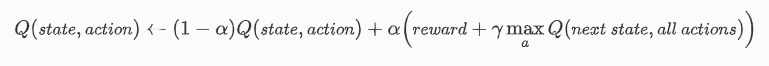


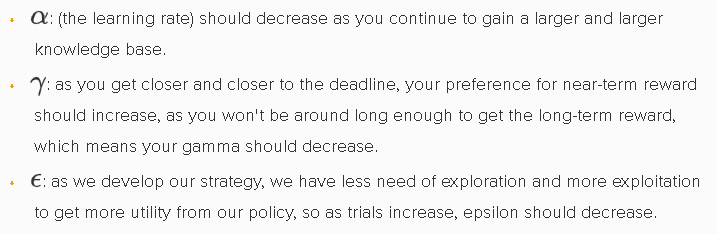

In [ ]:
import random
from IPython.display import clear_output
import numpy as np

if random.uniform(0, 1) < 0.3:
  print("ok")

In [ ]:
%%time
"""Training the agent"""

import random
from IPython.display import clear_output
import numpy as np

# Initialize the q table
q_table = np.zeros([env.observation_space.n, env.action_space.n])

def training(alpha,gamma,epsilon,Episode):

  # Hyperparameters
  alpha = alpha
  gamma = gamma
  epsilon = epsilon

  # For plotting metrics
  all_epochs = []
  all_penalties = []

  for i in range(1, Episode):
      state = env.reset()

      epochs, penalties, reward, = 0, 0, 0
      done = False
      
      while not done:
          if random.uniform(0, 1) < epsilon:
              action = env.action_space.sample() # Explore action space
          else:
              action = np.argmax(q_table[state]) # Exploit learned values

          next_state, reward, done, info = env.step(action) 
          
          old_value = q_table[state, action]
          next_max = np.max(q_table[next_state])
      
          new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
          q_table[state, action] = new_value

          if reward == -10:
              penalties += 1

          state = next_state
          epochs += 1
          
      if i % 100 == 0:
          clear_output(wait=True)
          print(f"Episode: {i}")

  print("Training finished.\n")
  env.render()

In [ ]:
training(.3,.5,.5,100000)

In [ ]:
env.encode

# Evalutation

In [ ]:
"""Evaluate agent's performance after Q-learning"""

def eval(episodes):

  total_epochs, total_penalties = 0, 0

  for _ in range(episodes):
      state = env.reset()
      epochs, penalties, reward = 0, 0, 0
      
      done = False
      
      while not done:
          action = np.argmax(q_table[state])
          state, reward, done, info = env.step(action)

          if reward == -10:
              penalties += 1

          epochs += 1

      total_penalties += penalties
      total_epochs += epochs

  print(f"Results after {episodes} episodes:")
  print(f"Average timesteps per episode: {total_epochs / episodes}")
  print(f"Average penalties per episode: {total_penalties / episodes}")
  env.render()

In [ ]:
eval(100000)